In [8]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

datapath = "/home/boittier/homepcb/water_pydcm/data/"
local_chgs = {}
rmses = {}
# fmdcm_gaussian_0_water_pbe0_dz_esp.cube.mdcm.xyz"
for d in Path(datapath).glob("fmdcm*"):
    lines = open(d).readlines()
    local = [[float(x) for x in _.split()[1:-1]] for _ in lines[17:23]]
    local_chgs[int((d.stem).split("_")[2])] = local
    rmses[int((d.stem).split("_")[2])] = float(
        lines[9].split()[1]
    )  # for i,line in enumerate(lines):
    #     print(i,line)

In [9]:
lines[9]

'        RMSE         6.824461547E-01 kcal/mol\n'

In [10]:
local_chgs

{2: [[0.3914452661222992, -8.75942777216e-05, -0.0521718152053121],
  [-0.3049876900684357, 0.0003397183984219, 0.544012874392177],
  [0.0363954744375857, -0.9225836370210315, -0.0361711339388201],
  [0.0363954744375857, 0.9225836370210315, -0.0361711339388201],
  [-0.3914452661222992, -8.75942777216e-05, -0.0521718152053121],
  [0.3049876900684357, 0.0003397183984219, 0.544012874392177]],
 3: [[0.3897788146497765, -9.12261687273e-05, -0.052951482475033],
  [-0.3049459038439878, 0.0003451073801521, 0.5434042428507644],
  [0.0354093157136092, -0.92319390614725, -0.0354494488351602],
  [0.0354093157136092, 0.92319390614725, -0.0354494488351602],
  [-0.3897788146497765, -9.12261687273e-05, -0.052951482475033],
  [0.3049459038439878, 0.0003451073801521, 0.5434042428507644]],
 4: [[0.3941562990332081, -8.16825289e-05, -0.0509039887401892],
  [-0.305052131569544, 0.0003309352280175, 0.5450074788307693],
  [0.0380022066213003, -0.9215903185692603, -0.037344406224791],
  [0.0380022066213003, 0

In [11]:
df_ = pd.read_csv("/home/boittier/homepcb/water_pydcm/csvs/water_pbe0_dz.csv")

In [12]:
d1 = [
    0.529177 * np.linalg.norm([local_chgs[x][0], local_chgs[x][1], local_chgs[x][2]])
    for x in df_.index
]
df_["rmses"] = [rmses[x] for x in df_.index]
df_

,idx,r1,r2,a2,E,rmse,Erel,rmses
0,0,0.909,0.909,84.45,-47903.625016,8.359403,12.439117,0.530238
1,1,0.909,0.909,86.45,-47905.200488,8.574808,10.863646,0.531745
2,2,0.909,0.909,88.45,-47906.604714,8.646543,9.459419,0.584846
3,3,0.909,0.909,90.45,-47907.842589,8.579634,8.221544,0.650095
4,4,0.909,0.909,92.45,-47908.918882,8.380967,7.145251,0.705486
...,...,...,...,...,...,...,...,...
175,175,1.009,1.009,114.45,-47911.743838,4.221247,4.320295,0.717865
176,176,1.009,1.009,116.45,-47911.067641,4.541050,4.996493,0.714032
177,177,1.009,1.009,118.45,-47910.302275,4.924091,5.761858,0.705804
178,178,1.009,1.009,120.45,-47909.452636,5.360268,6.611497,0.698333


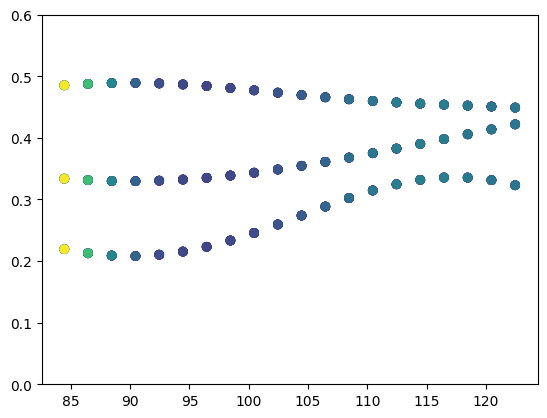

(0.0, 1.0)

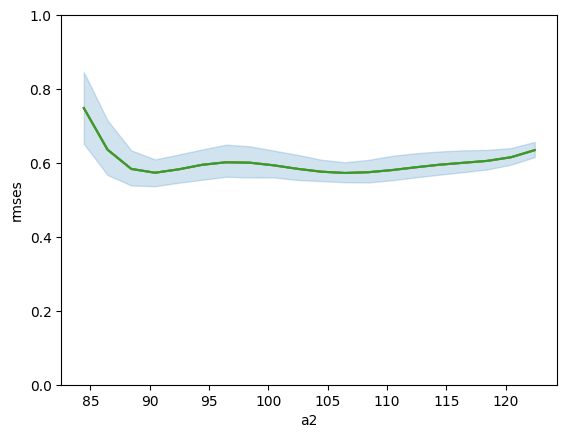

In [20]:
for i in range(6):
    d1 = [
        0.529177
        * np.linalg.norm(
            [local_chgs[x][i][0], local_chgs[x][i][1], local_chgs[x][i][2]]
        )
        for x in df_.index
    ]
    df_[f"rdcm{i}"] = d1
    df_

key = "a2"
plt.scatter(df_[key], df_["rdcm0"], c=df_["rmses"])
plt.scatter(df_[key], df_["rdcm1"], c=df_["rmses"])
plt.scatter(df_[key], df_["rdcm2"], c=df_["rmses"])

_ = list(set(df_[key]))
_.sort()
mean_error = [df_[df_[key] == x]["rmses"].mean() for x in _]
plt.ylim(0, 0.6)
plt.show()
import seaborn as sns

sns.lineplot(df_, x="a2", y="rmses")

plt.plot(_, mean_error)
# plt.ylim(0,1.4)
# plt.scatter(df_["a2"],df_["rdcm3"])
# plt.scatter(df_["a2"],df_["rdcm4"])
# plt.scatter(df_["a2"],df_["rdcm5"])
# plt.scatter(df_["a2"],df_["rdcm6"])

plt.plot(_, mean_error)
plt.ylim(0, 1)

<AxesSubplot: >

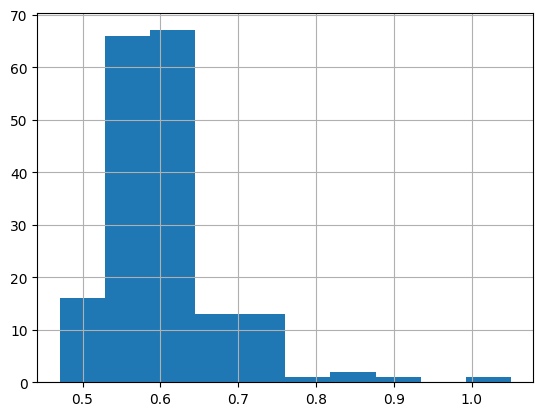

In [21]:
df_.rmses.hist()

In [83]:
_

[84.45,
 86.45,
 88.45,
 90.45,
 92.45,
 94.45,
 96.45,
 98.45,
 100.45,
 102.45,
 104.45,
 106.45,
 108.45,
 110.45,
 112.45,
 114.45,
 116.45,
 118.45,
 120.45,
 122.45]